# Loan Prediction

In [73]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
df = pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
df.dtypes



Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

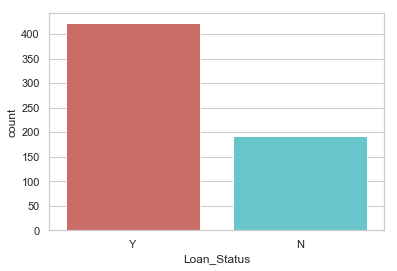

<Figure size 432x288 with 0 Axes>

In [74]:
sns.countplot(x='Loan_Status', data=df, palette='hls')
plt.show()
plt.savefig('count_plot')

In [75]:
count_aprov = len(df[df['Loan_Status']=='Y'])
count_not_aprov = len(df[df['Loan_Status']=='N'])
pct_of_aprov = count_aprov/(count_aprov+count_not_aprov)
print("percentage of aproved is", pct_of_aprov*100)
pct_of_not_aprov = count_not_aprov/(count_aprov+count_not_aprov)
print("percentage of not aproved", pct_of_not_aprov*100)

percentage of aproved is 68.72964169381108
percentage of not aproved 31.27035830618892


In [76]:
df.groupby(['Loan_Status']).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.064516,0.541899
Y,5384.068720,1504.516398,144.294404,341.072464,0.981818


In [77]:
df.groupby(['Loan_Status','Gender']).count()

Loan_ID  Married  Dependents  Education  Self_Employed  \
Loan_Status Gender                                                           
N           Female       37       37          36         37             35   
            Male        150      150         145        150            143   
Y           Female       75       74          73         75             69   
            Male        339      337         332        339            322   

                    ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status Gender                                                   
N           Female               37                 37          36   
            Male                150                150         140   
Y           Female               75                 75          73   
            Male                339                339         330   

                    Loan_Amount_Term  Credit_History  Property_Area  
Loan_Status Gender                                                   
N           Female                36              36             37  
            Male                 145             138            150  
Y           Female                73              65             75  
            Male                 333             313            339

In [78]:
df.groupby(['Loan_Status','Married']).count()

Loan_ID  Gender  Dependents  Education  Self_Employed  \
Loan_Status Married                                                          
N           No            79      78          77         79             75   
            Yes          113     109         109        113            108   
Y           No           134     132         132        134            124   
            Yes          285     279         281        285            272   

                     ApplicantIncome  CoapplicantIncome  LoanAmount  \
Loan_Status Married                                                   
N           No                    79                 79          75   
            Yes                  113                113         106   
Y           No                   134                134         131   
            Yes                  285                285         278   

                     Loan_Amount_Term  Credit_History  Property_Area  
Loan_Status Married                                                   
N           No                     77              74             79  
            Yes                   109             105            113  
Y           No                    131             125            134  
            Yes                   280             257            285

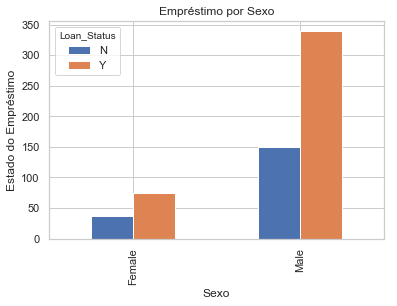

In [79]:
%matplotlib inline
pd.crosstab(df.Gender,df.Loan_Status).plot(kind='bar')
plt.title('Empréstimo por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Estado do Empréstimo')
plt.savefig('EmprestimoPorSexo')

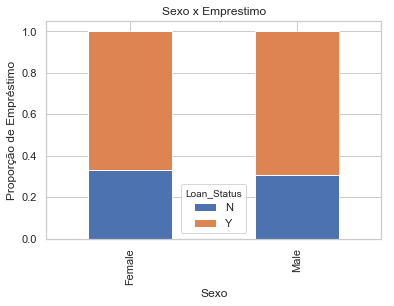

In [80]:
table=pd.crosstab(df.Gender,df.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Sexo x Emprestimo')
plt.xlabel('Sexo')
plt.ylabel('Proporção de Empréstimo')
plt.savefig('Prop_sexo_emprestimo')

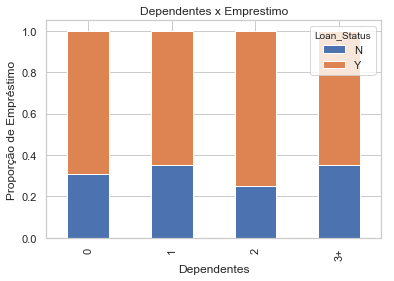

In [81]:
table=pd.crosstab(df.Dependents,df.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Dependentes x Emprestimo')
plt.xlabel('Dependentes')
plt.ylabel('Proporção de Empréstimo')
plt.savefig('Prop_dependentes_emprestimo')

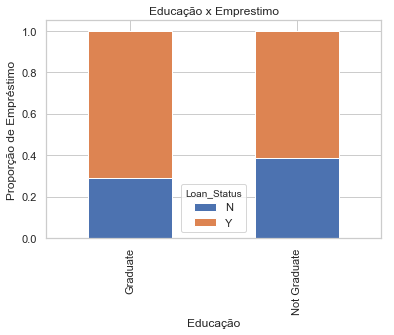

In [82]:
table=pd.crosstab(df.Education,df.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Educação x Emprestimo')
plt.xlabel('Educação')
plt.ylabel('Proporção de Empréstimo')
plt.savefig('Prop_educacao_emprestimo')

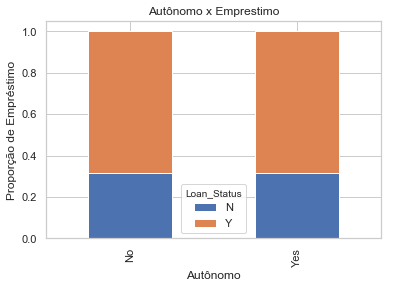

In [83]:
table=pd.crosstab(df.Self_Employed,df.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Autônomo x Emprestimo')
plt.xlabel('Autônomo')
plt.ylabel('Proporção de Empréstimo')
plt.savefig('Prop_autonomo_emprestimo')

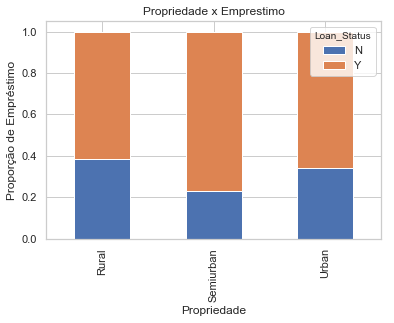

In [84]:
table=pd.crosstab(df.Property_Area,df.Loan_Status)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Propriedade x Emprestimo')
plt.xlabel('Propriedade')
plt.ylabel('Proporção de Empréstimo')
plt.savefig('Prop_propriedade_emprestimo')

In [85]:
# categorical missing values
df['Gender'] = df['Gender'].fillna('Unknown')
df['Married'] = df['Married'].fillna('Unknown')
df['Dependents'] = df['Dependents'].fillna('Unknown')
df['Education'] = df['Education'].fillna('Unknown')
df['Self_Employed'] = df['Self_Employed'].fillna('Unknown')
df['Property_Area'] = df['Property_Area'].fillna('Unknown')
df['Loan_Status'] = df.Loan_Status.replace('N', 0)
df['Loan_Status'] = df.Loan_Status.replace('Y', 1)
# continuous missing values
df['Credit_History'].apply(str)
df['Credit_History'] = df['Credit_History'].fillna('Unknown')
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [86]:
# dummy variables
cat_vars=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for var in cat_vars:
    cat_list = pd.get_dummies(df[var], prefix=var)
    df1=df.join(cat_list)
    df=df1




In [87]:
# remove columns
data_vars=df.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
df_final=df[to_keep]
del df_final['Loan_ID']
df_final.columns.values
# df_final.head()

array(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Gender_Female', 'Gender_Male',
       'Gender_Unknown', 'Married_No', 'Married_Unknown', 'Married_Yes',
       'Dependents_0', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Dependents_Unknown', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Unknown', 'Self_Employed_Yes', 'Credit_History_0.0',
       'Credit_History_1.0', 'Credit_History_Unknown',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'], dtype=object)

In [ ]:
# lets start by removing outliers
numeric_columns = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
# this function can be used on any dataset to return a list of index values for the outliers
def get_outliers(data, columns):
    # we create an empty list
    outlier_idxs = []
    for col in columns:
        elements = data[col]
        # we get the mean value for each column
        mean = elements.mean()
        # and the standard deviation of the column
        sd = elements.std()
        # we then get the index values of all values higher or lower than the mean +/- 2 standard deviations
        outliers_mask = data[(data[col] > mean + 3*sd) | (data[col] < mean - 3*sd)].index
        # and add those values to our list
        outlier_idxs += [x for x in outliers_mask]
    return list(set(outlier_idxs))

# we call the function we just created

df_outliers = get_outliers(df_final, numeric_columns)
print (df_outliers)
df_outliers = [elem for elem in df_outliers if elem[0] == 'train']
print (df_outliers)
# and drop those values
df_final = df_final.drop(df_outliers, axis = 0)
# we can check that this code has worked by looking at the shape of our data
print (df_final.shape)

In [88]:
# sampling with SMOTE
X = df_final.loc[:, df_final.columns != 'Loan_Status']
y = df_final.loc[:, df_final.columns == 'Loan_Status']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train.values.ravel())
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Loan_Status'])
# numbers of sampling
print("length of oversampled data is ",len(os_data_X))
print("Number of no Loan in oversampled data",len(os_data_y[os_data_y['Loan_Status']==0]))
print("Number of Loan",len(os_data_y[os_data_y['Loan_Status']==1]))
print("Proportion of no Loan data in oversampled data is ",len(os_data_y[os_data_y['Loan_Status']==0])/len(os_data_X))
print("Proportion of Loan data in oversampled data is ",len(os_data_y[os_data_y['Loan_Status']==1])/len(os_data_X))

length of oversampled data is  576
Number of no Loan in oversampled data 288
Number of Loan 288
Proportion of no Loan data in oversampled data is  0.5
Proportion of Loan data in oversampled data is  0.5


In [89]:
X_train.count()

ApplicantIncome            429
CoapplicantIncome          429
LoanAmount                 429
Loan_Amount_Term           429
Gender_Female              429
Gender_Male                429
Gender_Unknown             429
Married_No                 429
Married_Unknown            429
Married_Yes                429
Dependents_0               429
Dependents_1               429
Dependents_2               429
Dependents_3+              429
Dependents_Unknown         429
Education_Graduate         429
Education_Not Graduate     429
Self_Employed_No           429
Self_Employed_Unknown      429
Self_Employed_Yes          429
Credit_History_0.0         429
Credit_History_1.0         429
Credit_History_Unknown     429
Property_Area_Rural        429
Property_Area_Semiurban    429
Property_Area_Urban        429
dtype: int64

In [90]:
# RFE Recursive Feature Elimination
df_final_vars=df_final.columns.values.tolist()
y=['Loan_Status']
X=[i for i in df_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear')

rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True  True  True  True False False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True]
[7 6 3 5 1 1 1 1 1 4 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [91]:
x_col = pd.DataFrame({'Col_name': X_train.columns})
sel_col_index = x_col.index[rfe.support_].tolist()
print(sel_col_index)
sel_col = x_col['Col_name'].iloc[sel_col_index]
print(sel_col)
#X=os_data_X[sel_col]
X=pd.DataFrame(data=os_data_X,columns=sel_col)
y=os_data_y['Loan_Status']


[4, 5, 6, 7, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
4               Gender_Female
5                 Gender_Male
6              Gender_Unknown
7                  Married_No
8             Married_Unknown
11               Dependents_1
12               Dependents_2
13              Dependents_3+
14         Dependents_Unknown
15         Education_Graduate
16     Education_Not Graduate
17           Self_Employed_No
18      Self_Employed_Unknown
19          Self_Employed_Yes
20         Credit_History_0.0
21         Credit_History_1.0
22     Credit_History_Unknown
23        Property_Area_Rural
24    Property_Area_Semiurban
25        Property_Area_Urban
Name: Col_name, dtype: object


In [92]:
# model fit
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.493557
         Iterations: 35
                                     Results: Logit
Model:                      Logit                    Pseudo R-squared:         0.288     
Dependent Variable:         Loan_Status              AIC:                      600.5779  
Date:                       2019-06-02 18:46         BIC:                      670.2756  
No. Observations:           576                      Log-Likelihood:           -284.29   
Df Model:                   15                       LL-Null:                  -399.25   
Df Residuals:               560                      LLR p-value:              1.6535e-40
Converged:                  0.0000                   Scale:                    1.0000    
No. Iterations:             35.0000                                                      
-----------------------------------------------------------------------------------------
                         Coef.     Std.Err.      z    P>|z|      [0.025 

/home/lemos/miniconda3/envs/av/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/home/lemos/miniconda3/envs/av/lib/python3.7/site-packages/statsmodels/base/model.py:1092: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
/home/lemos/miniconda3/envs/av/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/lemos/miniconda3/envs/av/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/lemos/miniconda3/envs/av/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [95]:
# remove p-values > 0.05
print(sel_col)
del sel_col['Married_Unknown']

4               Gender_Female
5                 Gender_Male
6              Gender_Unknown
7                  Married_No
8             Married_Unknown
11               Dependents_1
12               Dependents_2
13              Dependents_3+
14         Dependents_Unknown
15         Education_Graduate
16     Education_Not Graduate
17           Self_Employed_No
18      Self_Employed_Unknown
19          Self_Employed_Yes
20         Credit_History_0.0
21         Credit_History_1.0
22     Credit_History_Unknown
23        Property_Area_Rural
24    Property_Area_Semiurban
25        Property_Area_Urban
Name: Col_name, dtype: object


KeyError: 'Married_Unknown'